# COS Halos Examples  [1.2]

    v1.2 -- Metallicity PDF

## See also the CGM_examples Notebook

In [19]:
# import
from imp import reload
from astropy.table import Table
from pyigm.cgm import cos_halos as pch

## Load COS-Halos

In [24]:
reload(pch)
cos_halos = pch.COSHalos()

Be patient, using /home/xavier/local/Python/pyigm/pyigm/data/CGM/COS_Halos/cos-halos_systems.v1.2.tar.gz to load
Skipping a likely folder: CGM_JSON


/home/xavier/local/Python/linetools/linetools/analysis/linelimits.py:165: UserWarning: Redshift=0.  If this is unexpected, set _z and reset limits
  warnings.warn("Redshift=0.  If this is unexpected, set _z and reset limits")


## Ion Table for the Survey

In [3]:
SiIII_tbl = cos_halos.ion_tbl((14,3))

In [4]:
SiIII_tbl

name,Z,ion,A,Ej,z,vmin,vmax,flag_N,logN,sig_logN,cgm_name
,,,,1 / cm,,km / s,km / s,,,,
str32,int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,str17
J022614.5+001529.8_z0.227,14,3,0,0.0,0.227439895272,-12.0,332.0,3,12.4409029284,9.0,J0226+0015_268_22
J040149-054056.6_z0.220,14,3,0,0.0,0.21968537569,-131.0,30.0,1,12.8839304247,0.0589624978602,J0401-0540_67_24
J080359.2+433258.4_z0.253,14,3,0,0.0,0.253473222256,-112.0,100.0,3,12.4798958102,9.0,J0803+4332_306_20
J091029.8+101413.6_z0.264,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,J0910+1014_242_34
J091029.8+101413.6_z0.143,14,3,0,0.0,0.142737910151,-198.0,39.0,2,13.2921316424,2.19425887455e-12,J0910+1014_34_46
J091440.4+282330.6_z0.244,14,3,0,0.0,0.244313806295,-118.0,62.0,1,12.6393110552,0.106136195362,J0914+2823_41_27
J092554.7+400414.1_z0.247,14,3,0,0.0,0.247452750802,-160.0,215.0,2,13.755260686,7.55368412675e-13,J0925+4004_196_22
J092838+602521_z0.154,14,3,0,0.0,0.154000431299,-272.0,104.0,2,13.7825557986,7.0935511931e-13,J0928+6025_110_35


## EW Table for the Survey for a given transition

In [5]:
trans = 'SiIII 1206'

In [6]:
tbl = cos_halos.trans_tbl(trans)
tbl

/home/xavier/local/Python/linetools/linetools/isgm/abssystem.py:357: UserWarning: No absline with input=SiIII 1206
  warnings.warn("No absline with input={}".format(inp))


sys,z,flag_EW,EW,sig_EW,flag_N,logN,sig_logN,cgm_name
str25,int64,int64,float64,float64,int64,float64,float64,str17
J022614.5+001529.8_z0.227,0,3,0.0187035460787,0.0346985201678,3,12.4409029284,9.0,J0226+0015_268_22
J040149-054056.6_z0.220,0,1,0.158317743378,0.0206134394617,1,12.8839304247,0.0589624978602,J0401-0540_67_24
J080359.2+433258.4_z0.253,0,3,0.0659387693411,0.0273459029983,3,12.4798958102,9.0,J0803+4332_306_20
J091029.8+101413.6_z0.264,0,0,0.0,0.0,0,0.0,0.0,J0910+1014_242_34
J091029.8+101413.6_z0.143,0,1,0.266071025784,0.0430094260887,2,13.2921316424,0.0725382044911,J0910+1014_34_46
J091440.4+282330.6_z0.244,0,1,0.0973287352148,0.0241202658941,1,12.6393110552,0.106136195362,J0914+2823_41_27
J092554.7+400414.1_z0.247,0,1,0.659247361319,0.0392895203043,2,13.755260686,0.0369738899171,J0925+4004_196_22
J092838+602521_z0.154,0,1,0.633640487432,0.0580960869061,2,13.7825557986,0.042448066175,J0928+6025_110_35
J093518.2+020415.5_z0.262,0,3,-0.0181768523915,0.0758331956641,3,12.7688619891,9.0,J0935+0204_15_28


## NHI Values (Prochaska+17)

In [14]:
NHI_tbl = Table()
NHI_tbl['name'] = cos_halos.name
NHI_tbl['NHI'] = cos_halos.NHI
NHI_tbl['flag_NHI'] = cos_halos.flag_NHI

In [15]:
NHI_tbl

name,NHI,flag_NHI
str17,float64,int64
J0226+0015_268_22,14.2486591339,1
J0401-0540_67_24,15.4493122101,1
J0803+4332_306_20,14.7820863724,1
J0910+1014_242_34,16.5752508361,1
J0910+1014_34_46,17.25,1
J0914+2823_41_27,15.4520301819,1
J0925+4004_196_22,19.5499992371,1
J0928+6025_110_35,19.3500003815,1
J0935+0204_15_28,12.6792974472,3


## Metallicity PDF

### Load

In [25]:
cos_halos.load_mtl_pdfs()

### Single system

In [26]:
j0226 = cos_halos.cgm_abs[0]
j0226

<CGMAbsSys: J0226+0015_268_22 Galaxy RA/DEC=02:26:12.9815+00:15:29.0955, zgal=0.22744, rho=84.1102 kpc>

In [28]:
j0226.igm_sys.metallicity

<MetallicityPDF: meanZH=-1.09689>

In [29]:
j0226.igm_sys.metallicity.medianZH

-1.0942307692307605

### Plot

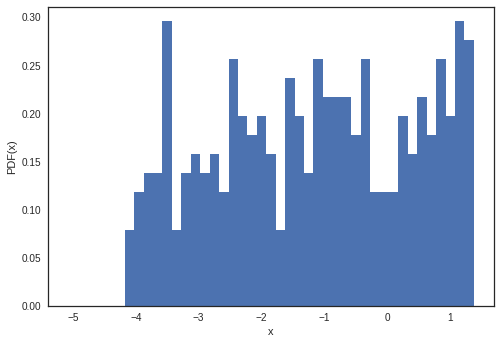

In [31]:
j0226.igm_sys.metallicity.hist_plot()

## Timing

In [7]:
import cProfile, profile
from pyigm.cgm import cos_halos as pch

In [8]:
reload(pch)
#profile.run('ch = pch.COSHalos(debug=True)')
#ch = pch.COSHalos(debug=True)
cProfile.run('ch = pch.COSHalos()')
#%prun -s cumtime 'pch.cosHalos(debug=True)'

Be patient, using /Users/xavier/local/Python/pyigm/pyigm/data/CGM/COS_Halos/cos-halos_systems.v1.1.tar.gz to load
Skipping a likely folder: CGM_JSON
         24934310 function calls (24407625 primitive calls) in 27.676 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   27.676   27.676 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 <string>:8(__new__)
       59    0.000    0.000    0.000    0.000 UserDict.py:4(__init__)
       44    0.000    0.000    0.208    0.005 __init__.py:258(load)
       44    0.000    0.000    0.150    0.003 __init__.py:294(loads)
    37732    0.057    0.000    0.089    0.000 __init__.py:33(get_format)
   160927    0.600    0.000    5.972    0.000 _abcoll.py:548(update)
       14    0.000    0.000    0.000    0.000 _funcsigs.py:232(__init__)
       24    0.000    0.000    0.000    0.000 _funcsigs.py:261(name)
       24    0.000    0.000    0.000    0.000 